In [1]:
pip install Graphviz

Note: you may need to restart the kernel to use updated packages.


# Preprocessing of Dateset

In [421]:
# Basics
import pandas as pd 
# import library to show dataset strucher 
## Make changes to basic data that is not arranged raw data so that the data will be converted from one form to another
import numpy as np 
# Mathematical library used in mathematical operation

# Visualization
import seaborn as sns
from sklearn import datasets # to read dataset
import matplotlib.pyplot as plt 
#Used to represent data in charts with ease and flexibility
%matplotlib inline 
# It is allowed to display graphs in the same document
sns.set(color_codes = True)
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
seed = 10
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix

In [452]:
from sklearn import datasets
dd = pd.read_csv('C:/Users/RaKaN/Desktop/Dataset_Project/data_banknote_authentication.txt', delimiter="," ,
                  names =['Variance of Wavelet Transformed image',
                                'Skewness of Wavelet Transformed image',
                                'Curtosis of Wavelet Transformed image',
                                'Entropy of image','Status'])
dd.head(None)

Variance of Wavelet Transformed image  \
0                                   3.62160   
1                                   4.54590   
2                                   3.86600   
3                                   3.45660   
4                                   0.32924   
...                                     ...   
1367                                0.40614   
1368                               -1.38870   
1369                               -3.75030   
1370                               -3.56370   
1371                               -2.54190   

      Skewness of Wavelet Transformed image  \
0                                   8.66610   
1                                   8.16740   
2                                  -2.63830   
3                                   9.52280   
4                                  -4.45520   
...                                     ...   
1367                                1.34920   
1368                               -4.87730   
1369                              -13.45860   
1370                               -8.38270   
1371                               -0.65804   

      Curtosis of Wavelet Transformed image  Entropy of image  Status  
0                                   -2.8073          -0.44699       0  
1                                   -2.4586          -1.46210       0  
2                                    1.9242           0.10645       0  
3                                   -4.0112          -3.59440       0  
4                                    4.5718          -0.98880       0  
...                                     ...               ...     ...  
1367                                -1.4501          -0.55949       1  
1368                                 6.4774           0.34179       1  
1369                                17.5932          -2.77710       1  
1370                                12.3930          -1.28230       1  
1371                                 2.6842           1.19520       1  

[1372 rows x 5 columns]

In [423]:
dd.info() 
#It returns the names of the columns, the number of records in the data frame, 
#the size of the frame in the memory, in addition to the type of data in each frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance of Wavelet Transformed image    1372 non-null float64
Skewness of Wavelet Transformed image    1372 non-null float64
Curtosis of Wavelet Transformed image    1372 non-null float64
Entropy of image                         1372 non-null float64
Status                                   1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [424]:
dd.isnull().any()
# Show us if there is any missing data if it appears False. This means that there are no missing data in this box. However,
# if the word True appears, it means that there are missing data and it must be dealt with before starting work.

Variance of Wavelet Transformed image    False
Skewness of Wavelet Transformed image    False
Curtosis of Wavelet Transformed image    False
Entropy of image                         False
Status                                   False
dtype: bool

In [425]:
dd.isnull().sum()

Variance of Wavelet Transformed image    0
Skewness of Wavelet Transformed image    0
Curtosis of Wavelet Transformed image    0
Entropy of image                         0
Status                                   0
dtype: int64

In [426]:
dd.corr()

Variance of Wavelet Transformed image  \
Variance of Wavelet Transformed image                               1.000000   
Skewness of Wavelet Transformed image                               0.264026   
Curtosis of Wavelet Transformed image                              -0.380850   
Entropy of image                                                    0.276817   
Status                                                             -0.724843   

                                       Skewness of Wavelet Transformed image  \
Variance of Wavelet Transformed image                               0.264026   
Skewness of Wavelet Transformed image                               1.000000   
Curtosis of Wavelet Transformed image                              -0.786895   
Entropy of image                                                   -0.526321   
Status                                                             -0.444688   

                                       Curtosis of Wavelet Transformed image  \
Variance of Wavelet Transformed image                              -0.380850   
Skewness of Wavelet Transformed image                              -0.786895   
Curtosis of Wavelet Transformed image                               1.000000   
Entropy of image                                                    0.318841   
Status                                                              0.155883   

                                       Entropy of image    Status  
Variance of Wavelet Transformed image          0.276817 -0.724843  
Skewness of Wavelet Transformed image         -0.526321 -0.444688  
Curtosis of Wavelet Transformed image          0.318841  0.155883  
Entropy of image                               1.000000 -0.023424  
Status                                        -0.023424  1.000000

In [427]:
print(dd["Status"].value_counts())

0    762
1    610
Name: Status, dtype: int64


In [428]:
dd.describe()
# Provide us with a lot of statistical information such as: average calculation, median, 
#number of records in each frame, standard deviation and so on 

Variance of Wavelet Transformed image  \
count                            1372.000000   
mean                                0.433735   
std                                 2.842763   
min                                -7.042100   
25%                                -1.773000   
50%                                 0.496180   
75%                                 2.821475   
max                                 6.824800   

       Skewness of Wavelet Transformed image  \
count                            1372.000000   
mean                                1.922353   
std                                 5.869047   
min                               -13.773100   
25%                                -1.708200   
50%                                 2.319650   
75%                                 6.814625   
max                                12.951600   

       Curtosis of Wavelet Transformed image  Entropy of image       Status  
count                            1372.000000       1372.000000  1372.000000  
mean                                1.397627         -1.191657     0.444606  
std                                 4.310030          2.101013     0.497103  
min                                -5.286100         -8.548200     0.000000  
25%                                -1.574975         -2.413450     0.000000  
50%                                 0.616630         -0.586650     0.000000  
75%                                 3.179250          0.394810     1.000000  
max                                17.927400          2.449500     1.000000

In [429]:
print(dd.shape)
print('coulmns are 5 and rows are 1372')

(1372, 5)
coulmns are 5 and rows are 1372


In [430]:
dd[dd["Variance of Wavelet Transformed image"] >= 0.754]

Variance of Wavelet Transformed image  \
0                                    3.6216   
1                                    4.5459   
2                                    3.8660   
3                                    3.4566   
5                                    4.3684   
...                                     ...   
1344                                 1.3451   
1345                                 2.2279   
1346                                 1.2572   
1351                                 1.3183   
1352                                 1.4896   

      Skewness of Wavelet Transformed image  \
0                                   8.66610   
1                                   8.16740   
2                                  -2.63830   
3                                   9.52280   
5                                   9.67180   
...                                     ...   
1344                                0.23589   
1345                                4.09510   
1346                                4.87310   
1351                                1.90170   
1352                                3.42880   

      Curtosis of Wavelet Transformed image  Entropy of image  Status  
0                                   -2.8073         -0.446990       0  
1                                   -2.4586         -1.462100       0  
2                                    1.9242          0.106450       0  
3                                   -4.0112         -3.594400       0  
5                                   -3.9606         -3.162500       0  
...                                     ...               ...     ...  
1344                                -1.8785          1.325800       1  
1345                                -4.8037         -2.111200       1  
1346                                -5.2861         -5.874100       1  
1351                                -3.3111          0.065071       1  
1352                                -4.0309         -1.425900       1  

[631 rows x 5 columns]

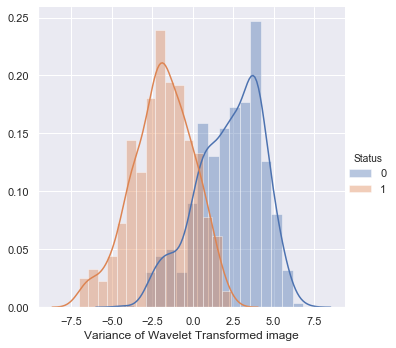

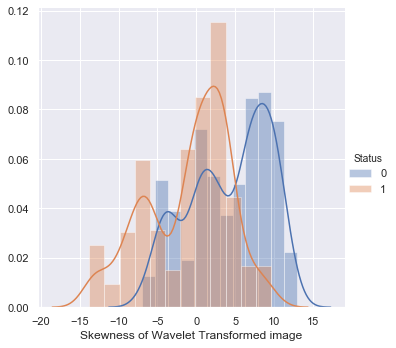

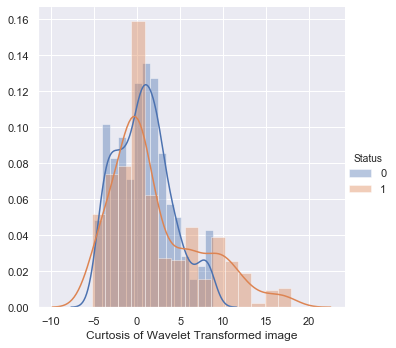

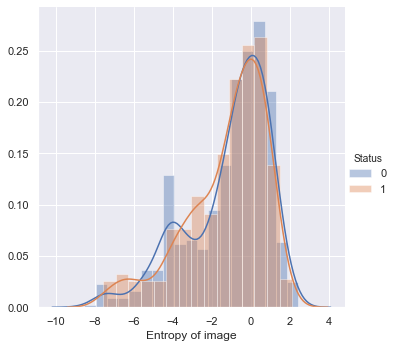

In [431]:
for ojha, feature in enumerate(list(dd.columns)[:-1]):
    fg = sns.FacetGrid(dd, hue='Status', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

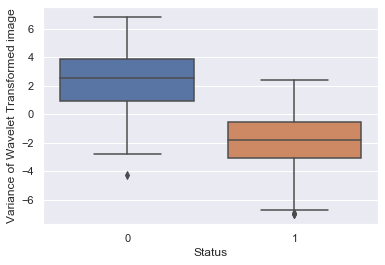

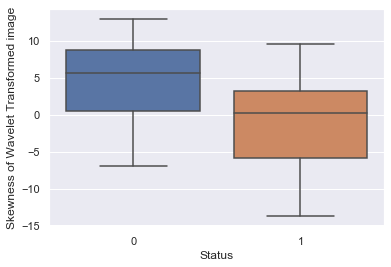

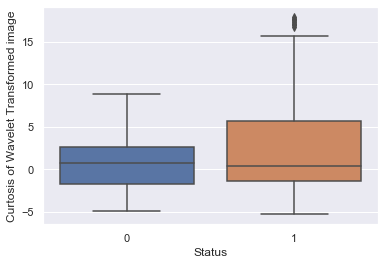

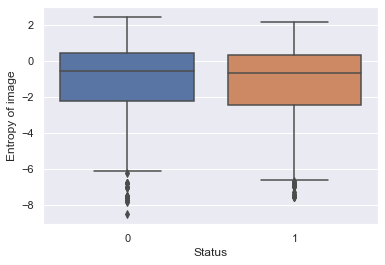

In [432]:
sns.boxplot(x='Status',y='Variance of Wavelet Transformed image', data=dd)
plt.show()
sns.boxplot(x='Status',y='Skewness of Wavelet Transformed image', data=dd)
plt.show()
sns.boxplot(x='Status',y='Curtosis of Wavelet Transformed image', data=dd)
plt.show()
sns.boxplot(x='Status',y='Entropy of image', data=dd)
plt.show()

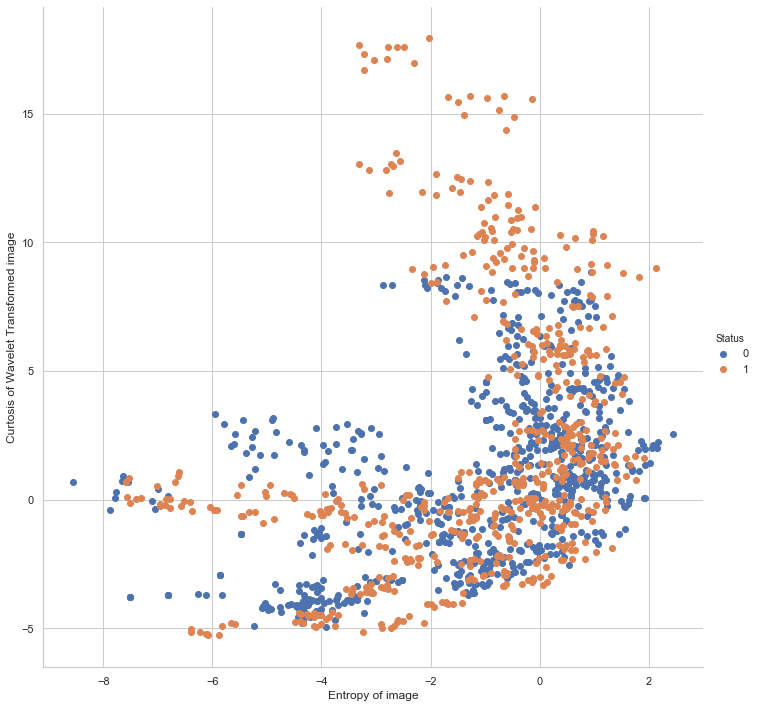

In [433]:
sns.set_style("whitegrid");
sns.FacetGrid(dd, hue="Status",height=10)\
   .map(plt.scatter,"Entropy of image","Curtosis of Wavelet Transformed image")\
   .add_legend();
plt.show();

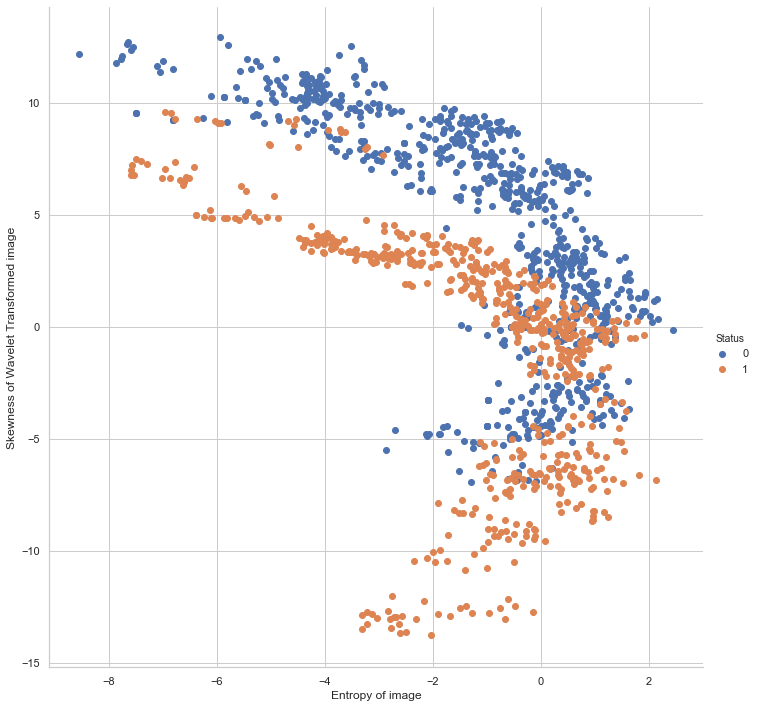

In [434]:
sns.set_style("whitegrid");
sns.FacetGrid(dd, hue="Status",height=10)\
   .map(plt.scatter,"Entropy of image","Skewness of Wavelet Transformed image")\
   .add_legend();
plt.show();

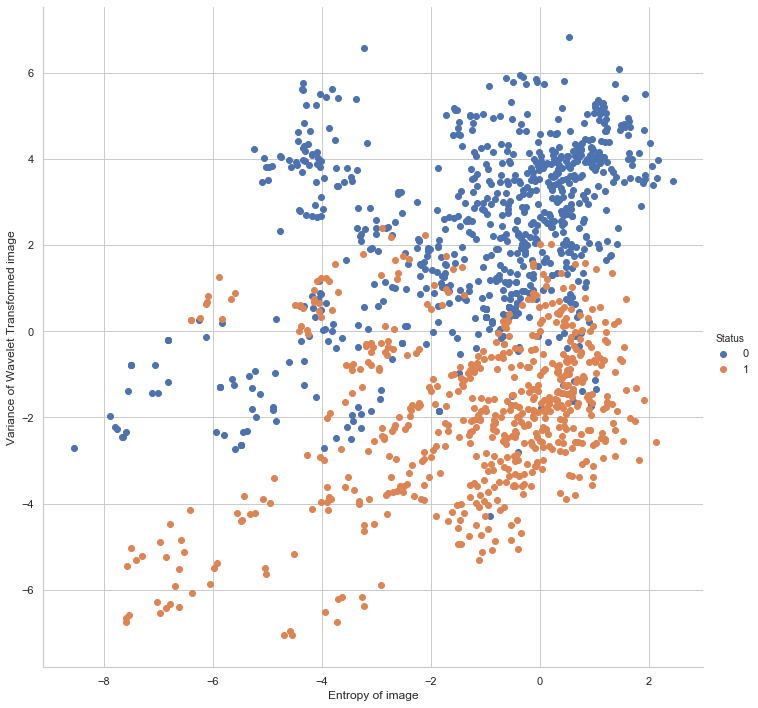

In [435]:
sns.set_style("whitegrid");
sns.FacetGrid(dd, hue="Status",height=10)\
   .map(plt.scatter,"Entropy of image","Variance of Wavelet Transformed image")\
   .add_legend();
plt.show();

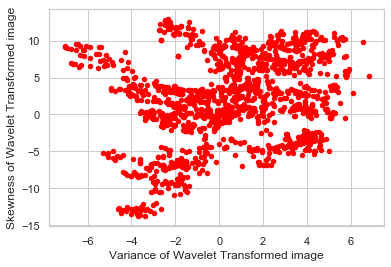

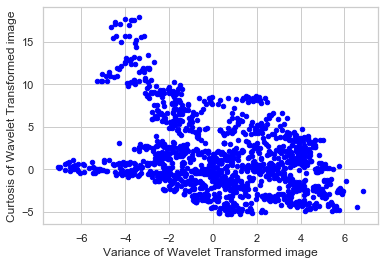

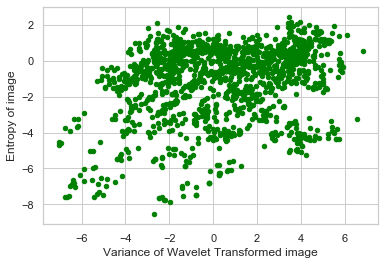

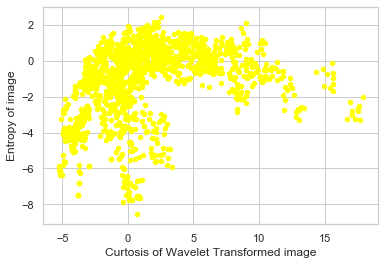

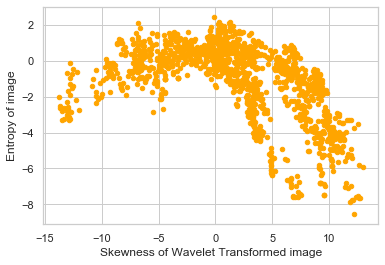

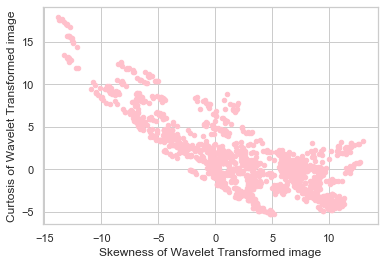

In [436]:
dd.plot(kind='scatter',x='Variance of Wavelet Transformed image',y='Skewness of Wavelet Transformed image',c='red')
plt.show()
dd.plot(kind='scatter',x='Variance of Wavelet Transformed image',y='Curtosis of Wavelet Transformed image',c='blue')
plt.show()
dd.plot(kind='scatter',x='Variance of Wavelet Transformed image',y='Entropy of image',c='green')
plt.show()
dd.plot(kind='scatter',x='Curtosis of Wavelet Transformed image',y='Entropy of image',c='yellow')
plt.show()
dd.plot(kind='scatter',x='Skewness of Wavelet Transformed image',y='Entropy of image',c='orange')
plt.show()
dd.plot(kind='scatter',x='Skewness of Wavelet Transformed image',y='Curtosis of Wavelet Transformed image',c='pink')
plt.show()

In [437]:
sns.set_style("whitegrid");
sns.pairplot(dd, vars = dd, hue ='Status', diag_kind = 'kde',
            plot_kws = {'alpha':0.9, 's':100, 'edgecolor': 'k'}, size = 20)
plt.show()

C:\Users\RaKaN\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\RaKaN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\RaKaN\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


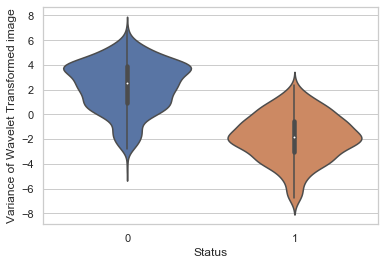

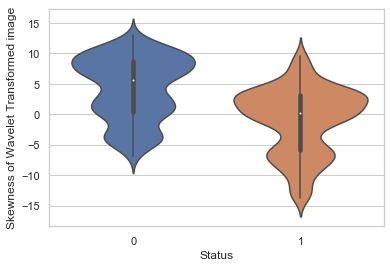

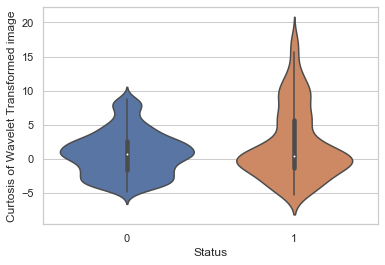

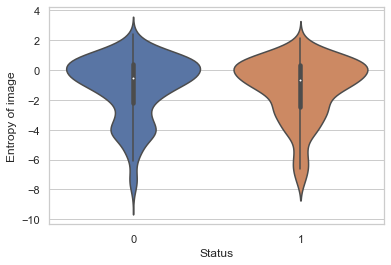

In [438]:
sns.violinplot(x='Status',y='Variance of Wavelet Transformed image', data=dd)
plt.show()
sns.violinplot(x='Status',y='Skewness of Wavelet Transformed image', data=dd)
plt.show()
sns.violinplot(x='Status',y='Curtosis of Wavelet Transformed image', data=dd)
plt.show()
sns.violinplot(x='Status',y='Entropy of image', data=dd)
plt.show()

In [439]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
features = ['Variance of Wavelet Transformed image','Skewness of Wavelet Transformed image','Curtosis of Wavelet Transformed image','Entropy of image']
# Separating out the features
x = dd.loc[:, features].values
# Separating out the target
y = dd.loc[:,['Status']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print (x)

[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.47235682 -2.62164576  3.75901744 -0.75488418]
 [-1.40669251 -1.75647104  2.552043   -0.04315848]
 [-1.04712236 -0.43982168  0.29861555  1.1364645 ]]


In [440]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [441]:
finalDf = pd.concat([principalDf, dd[['Status']]], axis = 1)

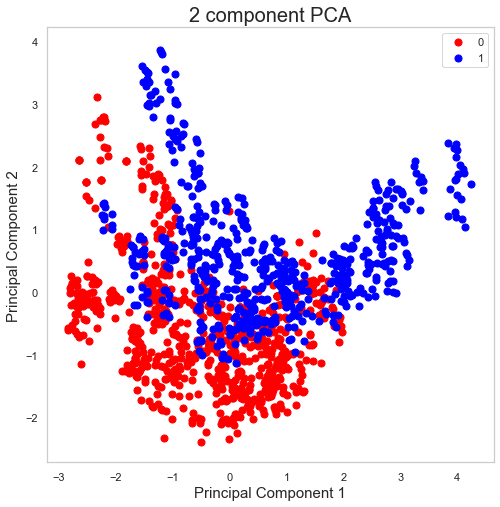

In [442]:
#sns.set(color_codes=True)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['red', 'blue']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [443]:
print(pca.explained_variance_ratio_)

[0.54497602 0.32328872]


In [444]:
print(dd["Status"].value_counts())

0    762
1    610
Name: Status, dtype: int64


In [445]:
le = LabelEncoder()
le.fit(dd['Status'].values)
y = le.transform(dd['Status'].values)
X = dd.drop('Status', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y, random_state=seed)

Text(0, 0.5, 'accuracy')

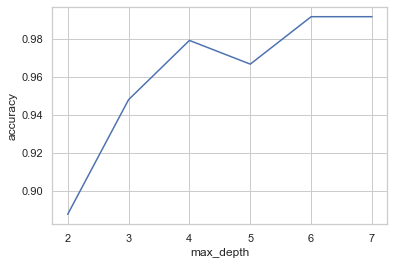

In [446]:
max_depth_range = list(range(2, 8))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(criterion='entropy',
                              min_samples_split=7,
                              max_depth= depth,
                              random_state=seed)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score) 
plt.plot(max_depth_range,accuracy)
plt.xlabel('max_depth')
plt.ylabel('accuracy')

In [447]:
tree = DecisionTreeClassifier(criterion='entropy',
                              min_samples_split=7,
                              max_depth=6,
                              random_state=seed)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.9916839916839917


Confusion Matrix is
[[266   1]
 [  3 211]]


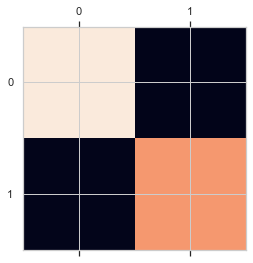

In [448]:
print('Confusion Matrix is')
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.show()

In [449]:
print(classification_report(y_test, y_pred, labels=dd['Status'].unique()))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       267
           1       1.00      0.99      0.99       214

    accuracy                           0.99       481
   macro avg       0.99      0.99      0.99       481
weighted avg       0.99      0.99      0.99       481



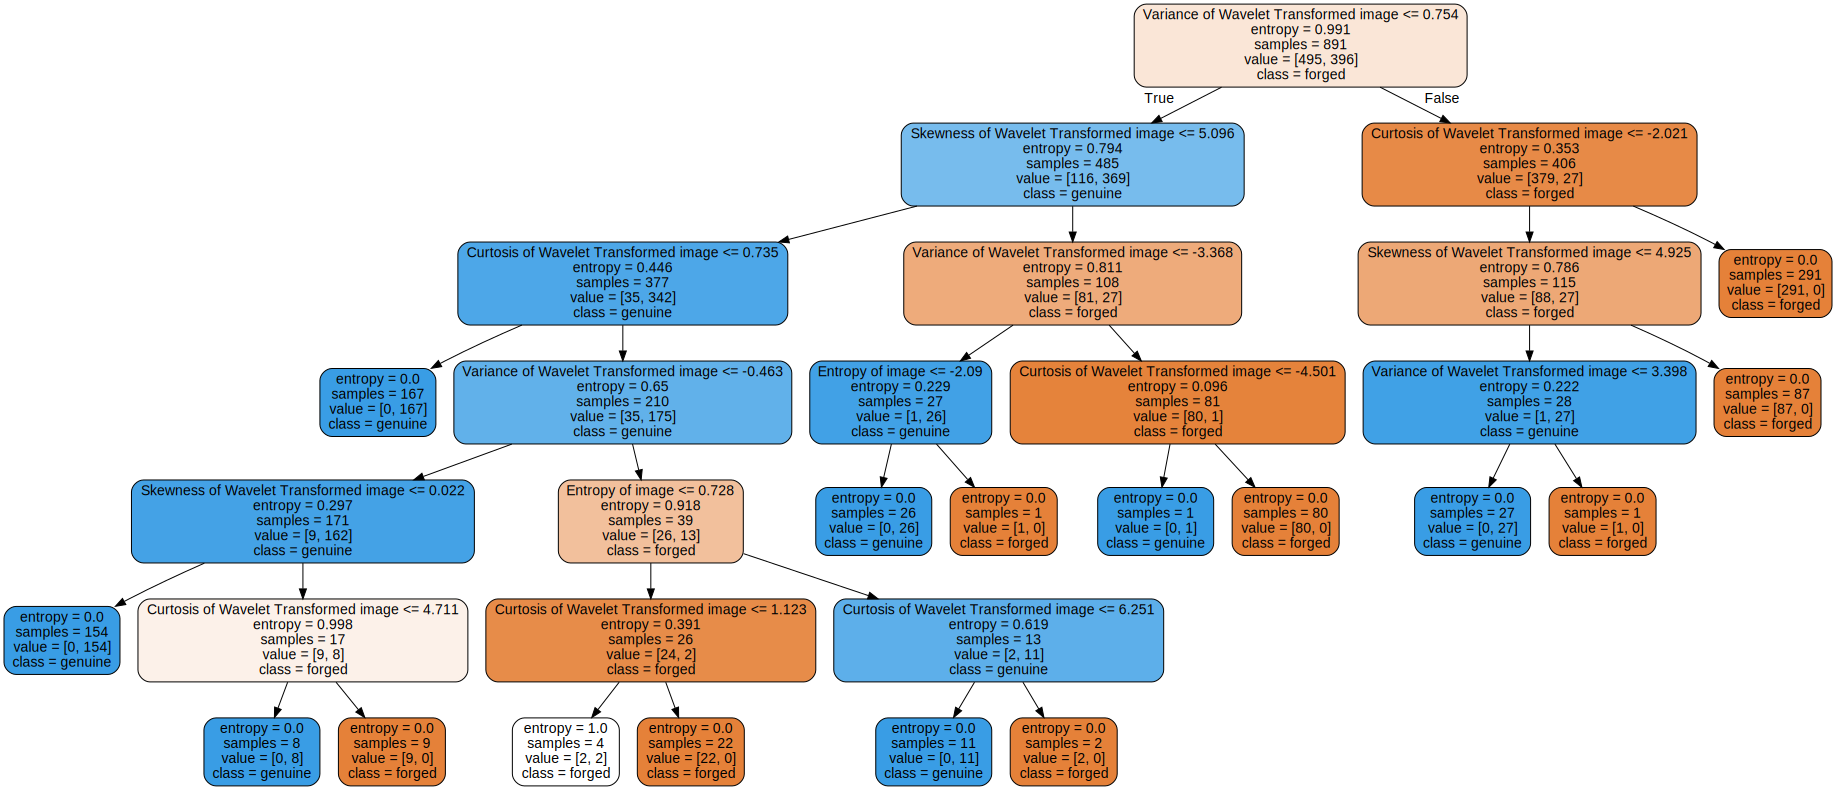

In [451]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'


def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names = ['forged','genuine']
    # Obtaining plot data.
    graph_data = export_graphviz(tree,
                                 feature_names=dataframe.drop(label_col, axis=1).columns,
                                 class_names=label_names,
                                 filled=True,
                                 rounded=True,
                                 out_file=None)
    # Generating plot.
    graph = graphviz.Source(graph_data)
    graph.render(plot_title, view = True)
    return graph
tree_graph = plot_tree(tree, dd, 'Status', le, 'DataSet Bank')
tree_graph